<a href="https://colab.research.google.com/github/bintefaisal/deep-learning-UGD/blob/main/data_augmentation_on_flowers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/13977181862_f8237b6b52.jpg'),
 PosixPath('datasets/flower_photos/daisy/2077865117_9ed85191ae_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2828733818_1c1ed0089d_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/9286947622_4822f4fc21.jpg'),
 PosixPath('datasets/flower_photos/daisy/3695826945_9f374e8a00_m.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('datasets/flower_photos/roses/512694812_48ba9c0b49_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8516036987_8a06dfe1b5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13231224664_4af5293a37.jpg'),
 PosixPath('datasets/flower_photos/roses/3065719996_c16ecd5551.jpg')]

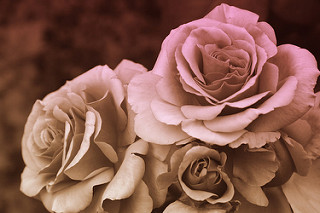

In [9]:
PIL.Image.open(str(roses[1]))

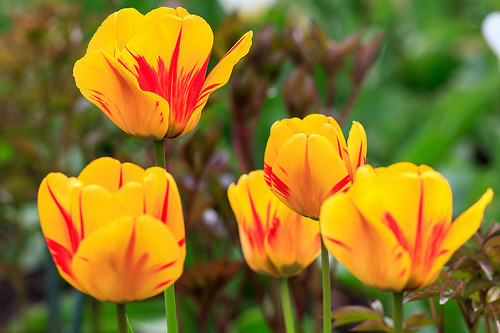

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'),
 PosixPath('datasets/flower_photos/roses/512694812_48ba9c0b49_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8516036987_8a06dfe1b5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13231224664_4af5293a37.jpg'),
 PosixPath('datasets/flower_photos/roses/3065719996_c16ecd5551.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(277, 320, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 7s 19ms/step - loss: 1.2959 - accuracy: 0.4477
Epoch 2/10
86/86 [==============================] - 2s 20ms/step - loss: 0.9527 - accuracy: 0.6334
Epoch 3/10
86/86 [==============================] - 2s 20ms/step - loss: 0.7816 - accuracy: 0.6955
Epoch 4/10
86/86 [==============================] - 2s 20ms/step - loss: 0.5644 - accuracy: 0.7972
Epoch 5/10
86/86 [==============================] - 2s 22ms/step - loss: 0.3656 - accuracy: 0.8663
Epoch 6/10
86/86 [==============================] - 2s 20ms/step - loss: 0.2088 - accuracy: 0.9346
Epoch 7/10
86/86 [==============================] - 2s 19ms/step - loss: 0.1050 - accuracy: 0.9688
Epoch 8/10
86/86 [==============================] - 2s 19ms/step - loss: 0.0514 - accuracy: 0.9891
Epoch 9/10
86/86 [==============================] - 2s 19ms/step - loss: 0.0431 - accuracy: 0.9880
Epoch 10/10
86/86 [==============================] - 2s 19ms/step - loss: 0.0672 - accuracy: 0.9800


In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 21ms/step - loss: 1.8236 - accuracy: 0.6416


[1.8236013650894165, 0.64161217212677]

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 15ms/step


array([[  2.7795734 ,   2.9546525 ,   5.171587  ,  -6.63092   ,
          2.6021883 ],
       [ 16.12931   ,   6.3373857 ,  -2.8093266 , -11.590892  ,
          3.2353244 ],
       [  1.5546768 ,  -0.02382466,   2.5323591 ,  -2.5498114 ,
          4.164925  ],
       ...,
       [ -2.838008  ,  -0.9451761 ,   1.9609107 ,   6.493872  ,
          1.3323479 ],
       [ 16.477467  ,   3.33469   ,  11.918958  , -14.406279  ,
         -1.6696181 ],
       [ -4.508575  ,  -0.9689369 ,   5.556855  ,  10.014216  ,
         -0.85193026]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

2

In [25]:
y_test[0]

1

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

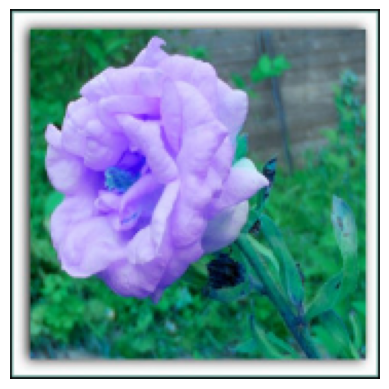

In [27]:
plt.axis('off')
plt.imshow(X[0])

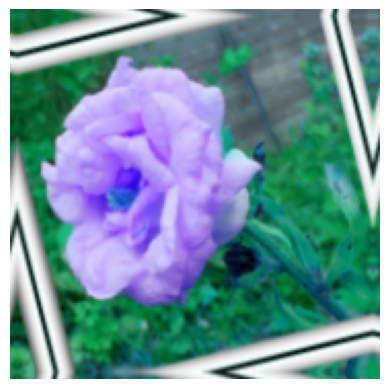

In [28]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [29]:
num_classes = 5

model = Sequential([
    data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 4s 23ms/step - loss: 1.3976 - accuracy: 0.4146
Epoch 2/10
86/86 [==============================] - 2s 24ms/step - loss: 1.0891 - accuracy: 0.5643
Epoch 3/10
86/86 [==============================] - 2s 20ms/step - loss: 0.9574 - accuracy: 0.6188
Epoch 4/10
86/86 [==============================] - 2s 24ms/step - loss: 0.8668 - accuracy: 0.6741
Epoch 5/10
86/86 [==============================] - 2s 21ms/step - loss: 0.8189 - accuracy: 0.6835
Epoch 6/10
86/86 [==============================] - 2s 21ms/step - loss: 0.7535 - accuracy: 0.7177
Epoch 7/10
86/86 [==============================] - 2s 21ms/step - loss: 0.7420 - accuracy: 0.7253
Epoch 8/10
86/86 [==============================] - 2s 24ms/step - loss: 0.6847 - accuracy: 0.7358
Epoch 9/10
86/86 [==============================] - 2s 23ms/step - loss: 0.6540 - accuracy: 0.7478
Epoch 10/10
86/86 [==============================] - 2s 21ms/step - loss: 0.6412 - accuracy: 0.7598
